In [67]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #seed() used for generate the same squence number in every time

# Generate 2D binary classification data
n = 200
X_class0 = np.random.randn(n//2, 2) + np.array([-2, -2])
X_class1 = np.random.randn(n//2, 2) + np.array([2, 2])

X = np.vstack((X_class0, X_class1)) # vstake(), It combines arrays row-wise (vertically) to make large dataset.
y = np.hstack((np.zeros(n//2), np.ones(n//2))) # hstack(), It joins rows side-by-side Horizontal stack

In [69]:
X

array([[-0.23594765, -1.59984279],
       [-1.02126202,  0.2408932 ],
       [-0.13244201, -2.97727788],
       [-1.04991158, -2.15135721],
       [-2.10321885, -1.5894015 ],
       [-1.85595643, -0.54572649],
       [-1.23896227, -1.87832498],
       [-1.55613677, -1.66632567],
       [-0.50592093, -2.20515826],
       [-1.6869323 , -2.85409574],
       [-4.55298982, -1.3463814 ],
       [-1.1355638 , -2.74216502],
       [ 0.26975462, -3.45436567],
       [-1.95424148, -2.18718385],
       [-0.46722079, -0.53064123],
       [-1.84505257, -1.62183748],
       [-2.88778575, -3.98079647],
       [-2.34791215, -1.84365103],
       [-0.76970932, -0.79762015],
       [-2.38732682, -2.30230275],
       [-3.04855297, -3.42001794],
       [-3.70627019, -0.0492246 ],
       [-2.50965218, -2.4380743 ],
       [-3.25279536, -1.22250964],
       [-3.61389785, -2.21274028],
       [-2.89546656, -1.6130975 ],
       [-2.51080514, -3.18063218],
       [-2.02818223, -1.57166813],
       [-1.93348278,

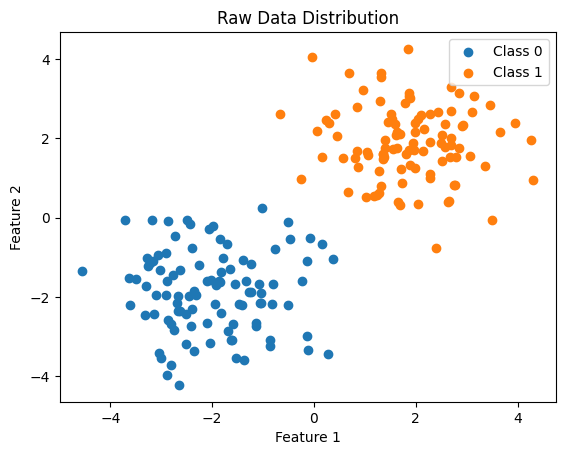

In [43]:
plt.figure()
plt.scatter(X_class0[:,0], X_class0[:,1], label="Class 0")
plt.scatter(X_class1[:,0], X_class1[:,1], label="Class 1")
plt.legend()
plt.title("Raw Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [44]:
# Feature normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add bias term
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

In [45]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [46]:
def compute_loss(X, y, theta):
    y_hat = sigmoid(X @ theta)
    eps = 1e-8
    return -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

In [47]:
def compute_gradient(X, y, theta):
    y_hat = sigmoid(X @ theta)
    return (1 / len(y)) * X.T @ (y_hat - y.reshape(-1,1))

In [48]:
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.1
epochs = 1000

loss_history = []

for epoch in range(epochs):
    gradients = compute_gradient(X_b, y, theta)
    theta -= learning_rate * gradients
    loss = compute_loss(X_b, y, theta)
    loss_history.append(loss)

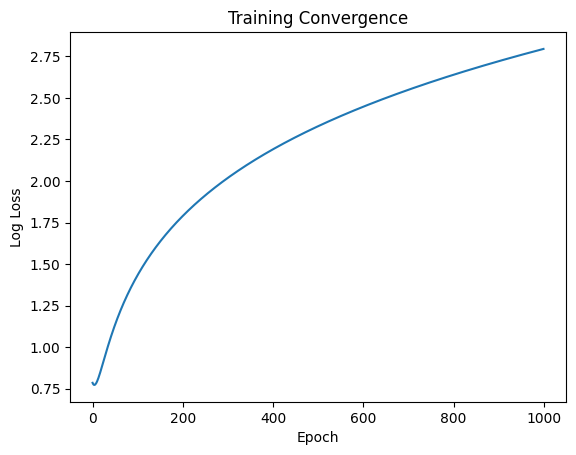

In [49]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training Convergence")
plt.show()

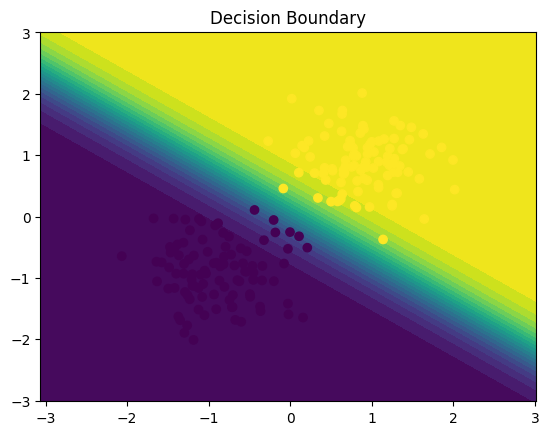

In [50]:
x_min, x_max = X_norm[:,0].min()-1, X_norm[:,0].max()+1
y_min, y_max = X_norm[:,1].min()-1, X_norm[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
probs = sigmoid(grid @ theta).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=20)
plt.scatter(X_norm[:,0], X_norm[:,1], c=y)
plt.title("Decision Boundary")
plt.show()

In [51]:
y_pred = (sigmoid(X_b @ theta) >= 0.5).astype(int).flatten()
accuracy = np.mean(y_pred == y)

print("Classification Accuracy:", accuracy)

Classification Accuracy: 1.0
